In [1]:
import os
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

project_folder = "D:\datasets\\radio_images"


# Small subset of data from CASA simulation

['bdcba5b1-f9a7-4d3d-9200-da9d709269e2'
 'e90d98d0-c51f-40a9-847c-e3ec96f088aa'
 'b982bfee-2892-45ae-a9b4-aae944389b6c'
 'ec9c1a8e-d317-498b-a22c-01853dd75949'
 '0752f979-f190-4126-96f2-34fa71774072'
 'dc13c0af-1624-45e3-805c-67a30c75b546'
 '78c2952d-0132-449a-a5e6-106b2fd3b71d'
 '738e8b1a-86e4-4199-908a-a6c4757ee976'
 '52d7042c-b527-4e3a-a80b-d5721300829d'
 'd855c581-cc86-42d6-b7ec-15648d0e410e'
 '77b8d72a-0c8e-4c2f-95b6-8b9ab946b269'
 '0f6e7e80-0004-44c3-b0ac-c92bdd13f439'
 '16cf711d-8e0b-4cc3-bc83-1a0f752193fa'
 'b7425879-b07d-4b54-834a-d8b33707b4aa'
 '60a5e44a-c8c4-40df-9626-62d5b8f31007'
 '1a52fb01-85d5-4c4c-b5cc-f93da9b67b42'
 '5b11184d-a36e-4ea7-b007-ea13a745984f'
 '2ab7a4c4-af4a-4296-84f7-4905bcff46f3'
 'de4b880f-bf3d-4f5b-9f79-1aa70bedbd17'
 'd795acd7-3550-4d11-8243-46975e7588c8'
 'dc218853-88ff-44f5-9de6-9e073a874f76'
 '8adbb186-0861-4b6b-bafa-e6ff2f77e3b3'
 'fd070646-87a7-41ea-9cc9-aab6f14246b4'
 '3f5a2f0e-4f5d-42ed-afe0-4c3cc030bf18'
 '9c271161-0a2e-4035-b665-5f89e110e33b'


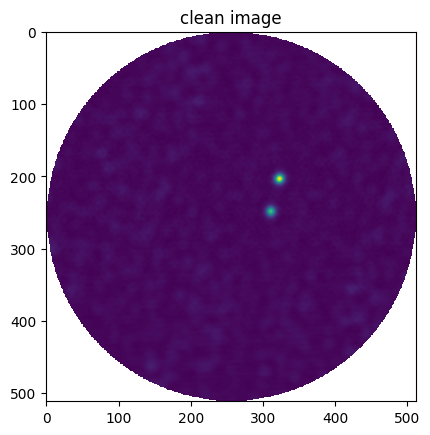

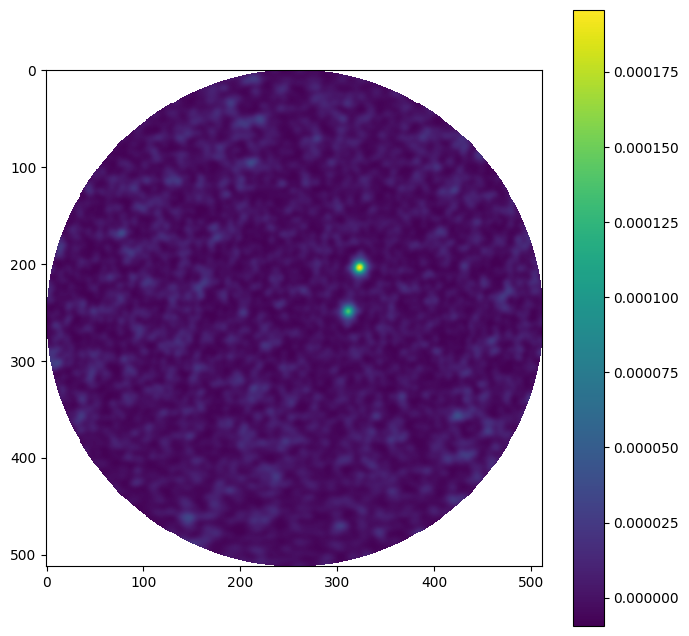

In [2]:
folder = "D1"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
print(sky_keys)
# print(phase_centers)
# print(sky_keys)
# print(phase_centers)
print()
clean = np.load(f"{project_folder}/{folder}/true/00001.npy")
# plt.title("clean image")
# print(clean)
# plt.figure(figsize=(8, 8))
# plt.imshow(clean, cmap='coolwarm', 
#            vmin=-0.0002, vmax=0.0004)
# plt.colorbar()
# plt.show()

plt.title("clean image")
print(clean)
plt.imshow(clean)

dirty = np.load(f"{project_folder}/{folder}/dirty/00001.npy")
print("dirty image")
print(dirty)
plt.figure(figsize=(8, 8))
plt.imshow(dirty, cmap='coolwarm', 
           vmin=-0.0002, vmax=0.0004)
plt.imshow(dirty)
plt.colorbar()
plt.show()

(1, 128, 128, 1)
[[[[5.1140243e-01]
   [6.6014707e-01]
   [5.3772128e-01]
   ...
   [5.3724170e-01]
   [1.1513263e-02]
   [5.0008297e-05]]

  [[8.2833755e-01]
   [4.5286655e-02]
   [9.0110242e-01]
   ...
   [5.0008297e-05]
   [6.0872287e-02]
   [9.7613990e-01]]

  [[2.5572759e-01]
   [1.5588701e-03]
   [9.8860896e-01]
   ...
   [9.7306126e-01]
   [5.0008297e-05]
   [9.5713186e-01]]

  ...

  [[5.0008297e-05]
   [5.0008297e-05]
   [1.1068970e-02]
   ...
   [5.0008297e-05]
   [9.0091097e-01]
   [8.5117424e-01]]

  [[2.9201356e-01]
   [6.1375177e-01]
   [1.2988567e-02]
   ...
   [9.9994999e-01]
   [6.9434404e-02]
   [9.5268422e-01]]

  [[2.1467209e-03]
   [6.1846232e-01]
   [1.4933646e-03]
   ...
   [1.4890778e-01]
   [3.1328857e-02]
   [1.5958777e-01]]]]


<Figure size 800x800 with 0 Axes>

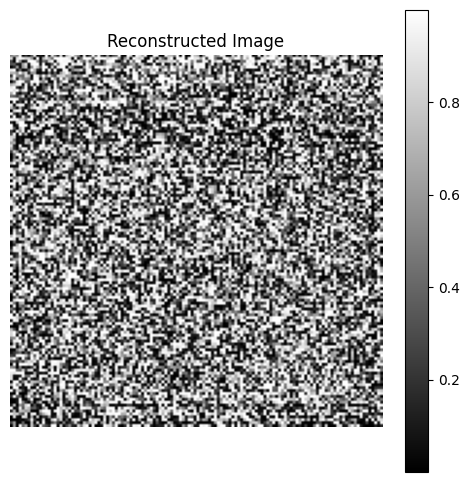

In [3]:
reconstructed = np.load("results/experiment1_power2/batch=0_val_generated_images.npy")
print(reconstructed.shape)
print(reconstructed)

# reconstructed_list = np.load("results/experiment1_power2/batch=0_val_generated_images.npy").tolist()
# 
# image = reconstructed_list[1]
# print(image)
plt.figure(figsize=(8, 8))
image = reconstructed[0, :, :, 0]  # 现在 image 的形状是 (128, 128)
# plt.imshow(reconstructed, cmap='coolwaarm',
#            vmin=-0.0002, vmax=0.0004)
# plt.imshow(image)
# plt.colorbar()
# plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')  # 用灰度图显示
plt.colorbar()
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

dirty image :


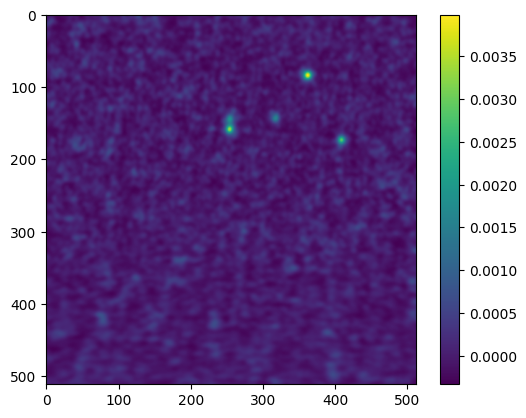

key : eb0dc461-5bcd-410c-b4a6-69590b5a510a
phase_centers : {'RA': 150.3506898270436, 'DEC': 2.076351921985916}


In [9]:
folder = "test_data"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
for i, key in enumerate(sky_keys[:2]):
    dirty = np.load(f"{project_folder}/{folder}/dirty/{i:05}.npy")
    print("dirty image :")
    plt.imshow(dirty)
    plt.colorbar()
    plt.show()
    print(f"key : {key}")
    print(f"phase_centers : {phase_centers[key]}")

In [10]:
folder = "test_data"
sky_keys = np.load(f"{project_folder}/{folder}/sky_keys.npy")
sky_sources_snr_extended = np.load(f"{project_folder}/{folder}/sky_sources_snr_extended.npy", allow_pickle=True).item()    
snr = np.load(f"{project_folder}/{folder}/sky_keys.npy")
phase_centers = np.load(f"{project_folder}/{folder}/ra_dec.npy", allow_pickle=True)
print(sky_keys)
print(phase_centers)
for i, key in enumerate(sky_keys[:2]):
    dirty = np.load(f"{project_folder}/{folder}/dirty/{i:05}.npy")
    true = np.load(f"{project_folder}/{folder}/true/{i:05}.npy")
    print("dirty image :")
    plt.imshow(dirty)
    plt.colorbar()
    plt.show()
    print("true image :")
    plt.imshow(true)
    plt.colorbar()
    plt.show()
    print(f"key : {key}")
    print(f"phase_centers : {phase_centers[key]}")
    print(f"sources (in ra, dec) : {sky_sources_snr_extended[key]}")

ModuleNotFoundError: No module named 'numpy._core'

# Simulate 

This code can be used to fast create toy data.

# Mock simulated train data

In [36]:
# Function to create a Gaussian
def add_gaussian(array, mean_x, mean_y, std_dev, max_value=1.0):
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            array[i, j] += max_value*np.exp(-((i-mean_x)**2 + (j-mean_y)**2)/(2*std_dev**2))
    return array

# Create a blank 512x512 array


# Function to generate random parameters for Gaussian
def generate_random_params():
    mean_x = np.random.randint(64, 512-64)
    mean_y = np.random.randint(64, 512-64)
    std_dev = random.uniform(0.5, 2.0)  # Chose random std_dev between 2 and 30
    max_value = random.uniform(0.5, 50)
    return mean_x, mean_y, std_dev, max_value


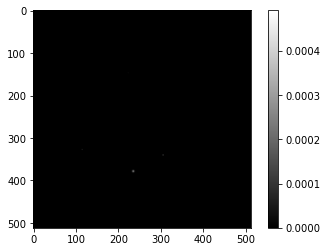

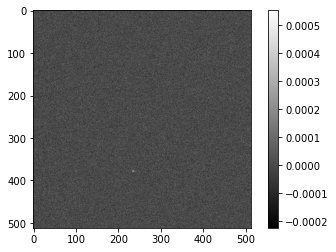

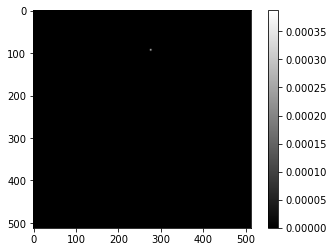

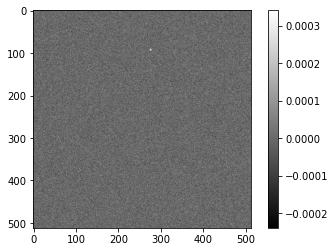

In [37]:
folder = "toy_data"
save_data = False

if not os.path.exists(f"{project_folder}/{folder}"):
    os.mkdir(f"{project_folder}/{folder}")
    
if not os.path.exists(f"{project_folder}/{folder}/dirty"):
    os.mkdir(f"{project_folder}/{folder}/dirty")
if not os.path.exists(f"{project_folder}/{folder}/true"):
    os.mkdir(f"{project_folder}/{folder}/true")
    
phase_centers = {}
keys_list = []
sky_sources_info = {}

noise_std = 5e-5
img_multiplier =  1e-5

for i in range(0, 2):
    image = np.zeros((512, 512))
    
    key = f"{i:06}" #could be any unique string
    keys_list.append(key)
    sky_sources_info[key] = []
    
    #generate random RA, DEC
    ra_min = 149.43959
    ra_max = 150.756584
    
    dec_min = 1.555417
    dec_max = 2.880238
    
    ra = random.uniform(ra_min, ra_max)
    dec = random.uniform(dec_min, dec_max)
    
    phase_centers[key] = {"RA" : ra, "DEC" : dec,}
    
    # Add three Gaussians with random mean values and std_dev
    for _ in range(np.random.randint(1, 5)):
        mean_x, mean_y, std_dev, max_value = generate_random_params()
        max_value = max_value*img_multiplier
        image_before = image.copy()  # Store the image before adding the Gaussian
        image = add_gaussian(image, mean_x, mean_y, std_dev, max_value)
        
        std_dev = 0.1*2.3548*std_dev
        
        flux = np.sum(image - image_before)  # Compute flux as sum of all the pixel values in the Gaussian
        SNR = max_value/noise_std
        
        beam_maj = 0.89
        beam_min = 0.82
        s_min = std_dev
        s_max = std_dev
        SNR_normalized = SNR*(beam_maj*beam_min)/np.sqrt((beam_maj**2+s_max**2)*(beam_min**2+s_min**2))

        sky_sources_info[key].append([
            ra,
            dec,
            SNR,
            SNR_normalized,
            flux,
            std_dev,
            std_dev,
        ])

    # Scale the array so that its maximum is around 10**(-5)
    filename = f"{i:06}.npy"
    
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    if save_data:
        np.save(f"/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/true/{filename}", image)
    
    # Add Gaussian noise on top
    noise = np.random.normal(0, noise_std, image.shape)
    image += noise
    if save_data:
        np.save(f"/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/dirty/{filename}", image)
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    
if save_data:
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/ra_dec.npy", phase_centers)
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/sky_keys.npy", keys_list)
    np.save("/home/drozdova/projects/diffusion-for-sources-characterisation/toy_data/sky_sources_snr_extended.npy", sky_sources_info)    



# Mock simulated real data

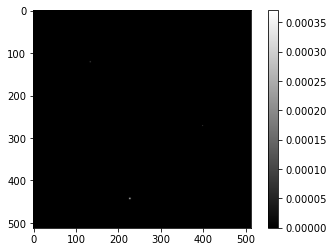

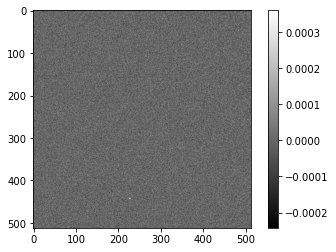

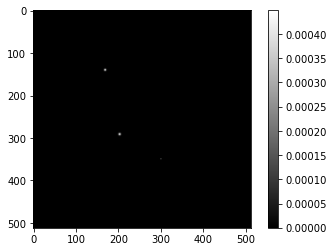

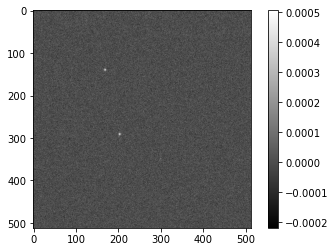

In [39]:
folder = "toy_real_data"
save_data = False

if not os.path.exists(f"{project_folder}/{folder}"):
    os.mkdir(f"{project_folder}/{folder}")
    
if not os.path.exists(f"{project_folder}/{folder}/dirty"):
    os.mkdir(f"{project_folder}/{folder}/dirty")
    
phase_centers = {}
keys_list = []
sky_sources_info = {}

noise_std = 5e-5
img_multiplier =  1e-5

for i in range(0, 2):
    image = np.zeros((512, 512))
    
    key = f"{i:06}" #could be any unique string
    keys_list.append(key)
    sky_sources_info[key] = []
    
    #generate random RA, DEC
    ra_min = 149.43959
    ra_max = 150.756584
    
    dec_min = 1.555417
    dec_max = 2.880238
    
    ra = random.uniform(ra_min, ra_max)
    dec = random.uniform(dec_min, dec_max)
    
    phase_centers[key] = {"RA" : ra, "DEC" : dec,}
    
    # Add three Gaussians with random mean values and std_dev
    for _ in range(np.random.randint(1, 5)):
        mean_x, mean_y, std_dev, max_value = generate_random_params()
        max_value = max_value*img_multiplier
        image_before = image.copy()  # Store the image before adding the Gaussian
        image = add_gaussian(image, mean_x, mean_y, std_dev, max_value)
        
        std_dev = 0.1*2.3548*std_dev
        
        flux = np.sum(image - image_before)  # Compute flux as sum of all the pixel values in the Gaussian
        SNR = max_value/noise_std
        
        beam_maj = 0.89
        beam_min = 0.82
        s_min = std_dev
        s_max = std_dev
        SNR_normalized = SNR*(beam_maj*beam_min)/np.sqrt((beam_maj**2+s_max**2)*(beam_min**2+s_min**2))

        sky_sources_info[key].append([
            ra,
            dec,
            SNR,
            SNR_normalized,
            flux,
            std_dev,
            std_dev,
        ])

    # Scale the array so that its maximum is around 10**(-5)
    filename = f"{i:06}.npy"
    
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()

    # Add Gaussian noise on top
    noise = np.random.normal(0, noise_std, image.shape)
    image += noise
    
    if save_data:
        np.save(f"{project_folder}/{folder}/dirty/{filename}", image)
    # Plotting the generated image
    plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    
if save_data:  
    np.save(f"{project_folder}/{folder}/ra_dec.npy", phase_centers)
    np.save(f"{project_folder}/{folder}//sky_keys.npy", keys_list)
